# Import 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, stats


# Read the data set

In [2]:
df=pd.read_csv("Complete_Dataset_updated.csv")
df.head(10)

,Date,DOY,Sample,Sub-Sample,Lat,Long_,Sample_type,Animals,DM,MM,...,PRES_ATM,HUM_REL,TP_SFC_AVG,Wind_Dir,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG,Environmental Suitability Index
0,7/6/2022,187,1,1,-20.446717,-54.839505,Q1,1,54.177195,6.869019,...,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.209516
1,7/6/2022,187,1,2,-20.446717,-54.839505,Q1,1,54.177058,6.835684,...,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,5.109516
2,7/6/2022,187,2,1,-20.446996,-54.838856,Q4,1,52.260843,5.125652,...,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.506646
3,7/6/2022,187,2,2,-20.446996,-54.838856,Q4,1,52.285797,5.241126,...,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.606646
4,7/6/2022,187,3,1,-20.446424,-54.839246,G2,1,49.984466,4.742429,...,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.703806
5,7/6/2022,187,3,2,-20.446424,-54.839246,G2,1,50.040418,4.718451,...,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.103806
6,7/6/2022,187,4,1,-20.446333,-54.838763,G3,1,49.774424,8.110455,...,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.306081
7,7/6/2022,187,4,2,-20.446333,-54.838763,G3,1,49.572758,7.907331,...,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.306081
8,7/6/2022,187,5,1,-20.446437,-54.839261,Q2,1,51.658871,4.611986,...,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.103806
9,7/6/2022,187,5,2,-20.446437,-54.839261,Q2,1,51.871540,4.633134,...,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.203806


# Biomass

In [3]:
mean_biomass = df['Biomass'].mean()
median_biomass = df['Biomass'].median()
mode_biomass = df['Biomass'].mode().iloc[0]
print("\nBiomass Central Tendency:")
print(f"Mean: {mean_biomass}")
print(f"Median: {median_biomass}")
print(f"Mode: {mode_biomass}")


Biomass Central Tendency:
Mean: 4302.398076956089
Median: 3189.8333334999998
Mode: 414.3333333


I notice that there a pig gap between median and the mean

## The biomass distribution on the farm

C:\Users\user\AppData\Local\Temp\ipykernel_16596\2257018497.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Long_'], df['Lat'], s=df['Biomass']/10, c="green",cmap='Blues', alpha=0.6, edgecolors='black')


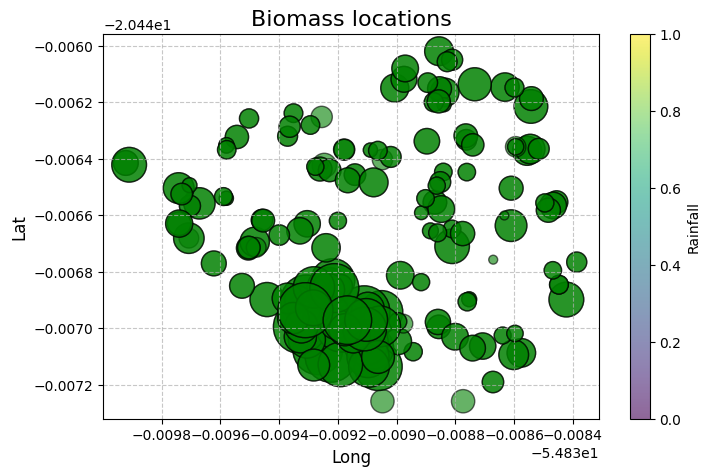

In [4]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Long_'], df['Lat'], s=df['Biomass']/10, c="green",cmap='Blues', alpha=0.6, edgecolors='black')
plt.colorbar(label='Rainfall')
plt.title('Biomass locations', fontsize=16)
plt.xlabel('Long', fontsize=12)
plt.ylabel('Lat', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

As we can see, there is an area with high biomass, and I want to understand the reasons behind it. To investigate, I will create a heatmap to identify the features that might influence biomass, which could help explain this gap.

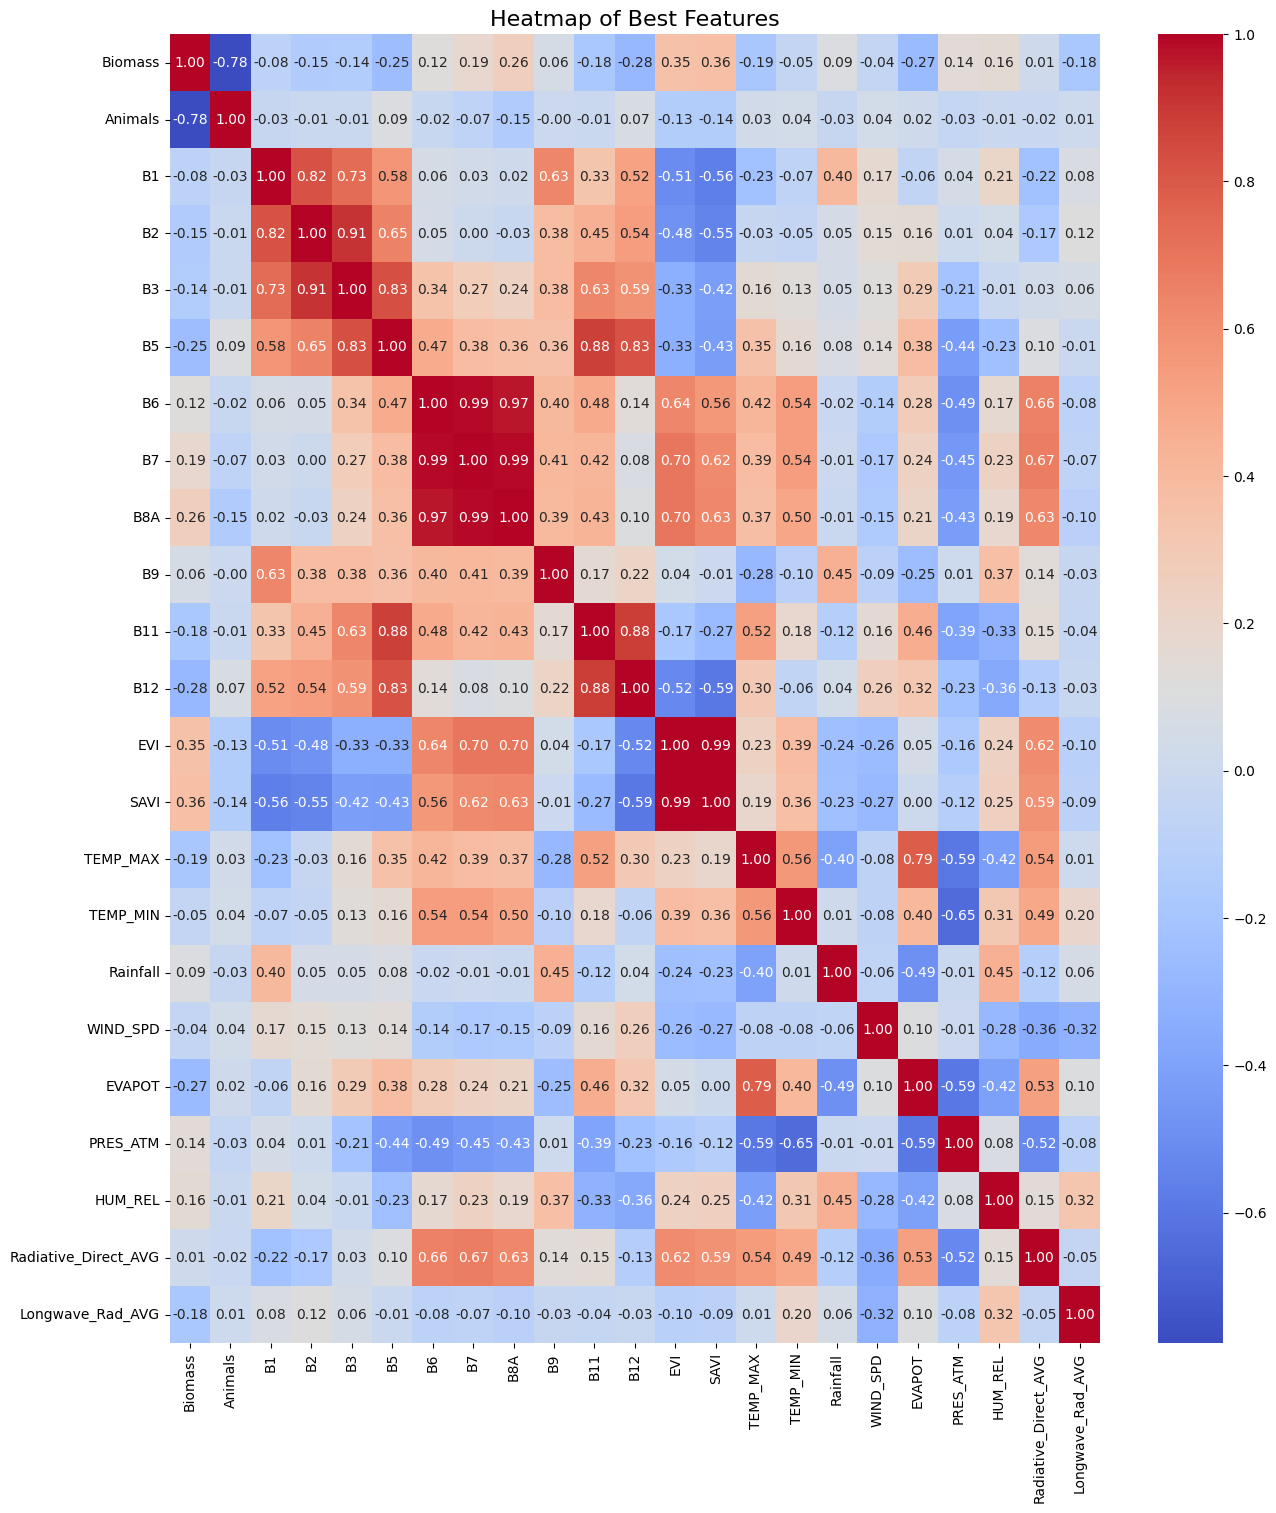

In [5]:

best_features = df[['Biomass', 'Animals', 'B1','B2','B3',
                    'B5','B6','B7','B8A','B9','B11',
                    'B12','EVI','SAVI','TEMP_MAX','TEMP_MIN',
                    'Rainfall','WIND_SPD','EVAPOT','PRES_ATM',
                    'HUM_REL','Radiative_Direct_AVG','Longwave_Rad_AVG'
                    ]]

plt.figure(figsize=(15,17))
sns.heatmap(best_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Best Features', fontsize=16)
plt.show()

I will search in the relation of the biomass with (Animals , Radioactive , SAVI, and Evapot)

### Biomass and Radio Active

#### Is there any linear relation:

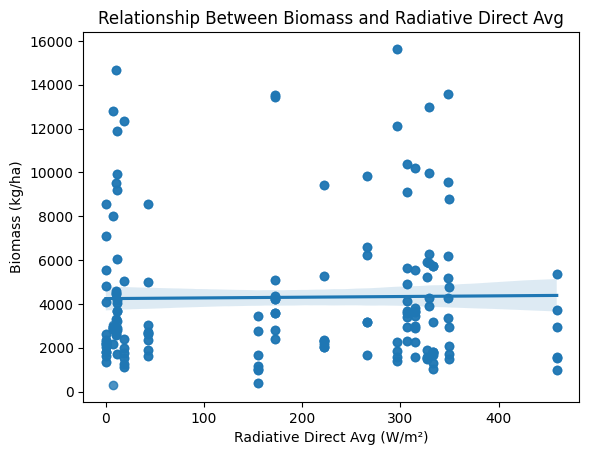

In [6]:
sns.regplot(x='Radiative_Direct_AVG', y='Biomass', data=df)
plt.title('Relationship Between Biomass and Radiative Direct Avg')
plt.xlabel('Radiative Direct Avg (W/m²)')
plt.ylabel('Biomass (kg/ha)')
plt.show()


No there is no linear relation

### Biomass with SAVI

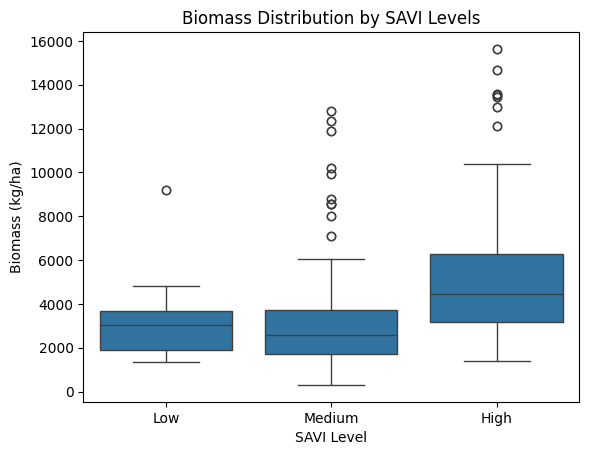

In [7]:
df['SAVI_Bin'] = pd.cut(df['SAVI'], bins=3, labels=['Low', 'Medium', 'High'])
sns.boxplot(x='SAVI_Bin', y='Biomass', data=df)
plt.title('Biomass Distribution by SAVI Levels')
plt.xlabel('SAVI Level')
plt.ylabel('Biomass (kg/ha)')
plt.show()


The chart shows the distribution of biomass based on three levels of the SAVI index: low, medium, and high. From the analysis, there is a clear positive relationship between SAVI and biomass. At the low SAVI level, biomass values mostly range between 2000 and 4000 kg/ha, with a few outliers. In the medium SAVI level, biomass slightly increases, with some outliers reaching around 6000 kg/ha. At the high SAVI level, biomass values are much higher, mostly ranging between 4000 and 12000 kg/ha, with a few extreme values above 14000 kg/ha. This shows that areas with healthier and denser vegetation (as indicated by higher SAVI values) tend to produce more biomass, making SAVI a useful indicator for plant productivity.

### Biomass and Evapot

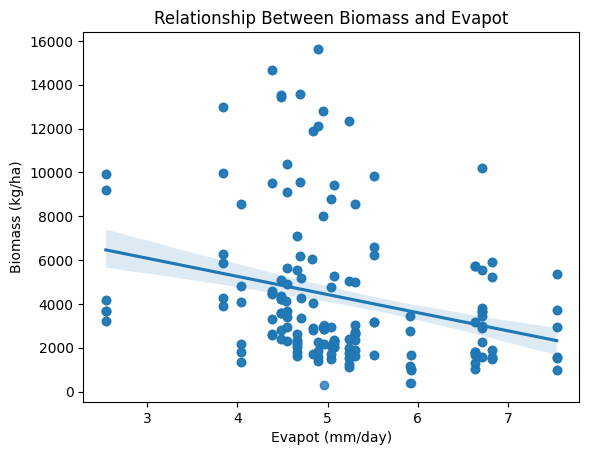

In [8]:
sns.regplot(x='EVAPOT', y='Biomass', data=df)
plt.title('Relationship Between Biomass and Evapot')
plt.xlabel('Evapot (mm/day)')
plt.ylabel('Biomass (kg/ha)')
plt.show()


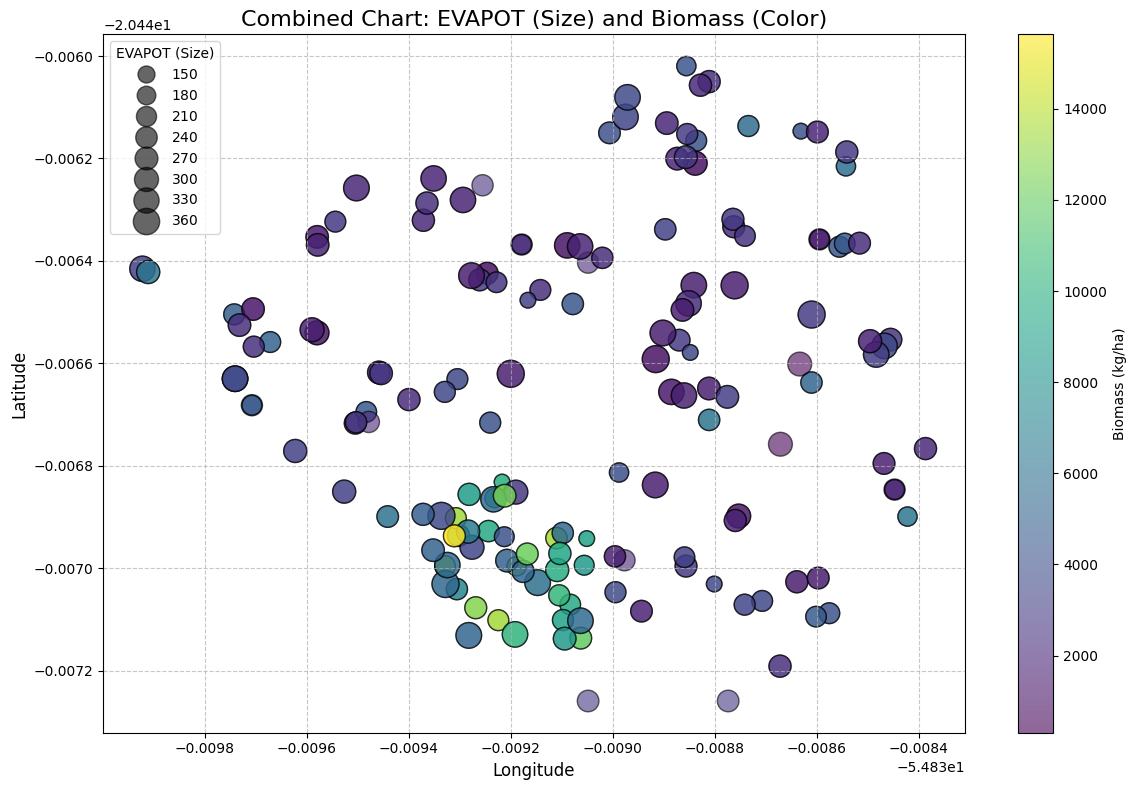

In [9]:

# Create a scatter plot for EVAPOT (Size) and Biomass (Color) with Latitude and Longitude
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['Long_'], df['Lat'], 
    # Scale EVAPOT for better visualization
    s=df['EVAPOT'] * 50,  
    alpha=0.6, 
    c=df['Biomass'], 
    cmap='viridis', 
    edgecolors='black'
)

plt.colorbar(scatter, label='Biomass (kg/ha)', orientation='vertical')
plt.title('Combined Chart: EVAPOT (Size) and Biomass (Color)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
plt.legend(handles, labels, loc="upper left", title="EVAPOT (Size)")
plt.tight_layout()
plt.show()


The results show a geographical distribution of **Biomass** and **Evapotranspiration (EVAPOT)** across different locations. The size of the points represents the **EVAPOT** values, while the color represents the **Biomass** levels. Areas with larger points (higher EVAPOT) do not always correspond to higher Biomass, as shown by the color variations. This observation is reinforced by the scatter plot, which indicates a weak negative relationship between EVAPOT and Biomass. As EVAPOT increases, there is a slight decrease in Biomass, suggesting that higher evapotranspiration might contribute to reduced plant productivity, likely due to water loss. However, the relationship is not strong.

### Biomass and Animals

#### study the Animal col:

In [10]:
product_category_by_year = df.groupby(['Animals', 'Sample_type'])['Animals'].count()
product_category_by_year

Animals  Sample_type
0        S1             42
         S2             42
1        G1             20
         G2             18
         G3             12
         G4             12
         Q1             42
         Q2             40
         Q3             42
         Q4             42
Name: Animals, dtype: int64

As we see S1 , S2 dont have animals 

In [11]:
Sample_type_values=df["Sample_type"].value_counts()  
Sample_type_values

Sample_type
Q1    42
Q4    42
Q3    42
S1    42
S2    42
Q2    40
G1    20
G2    18
G3    12
G4    12
Name: count, dtype: int64

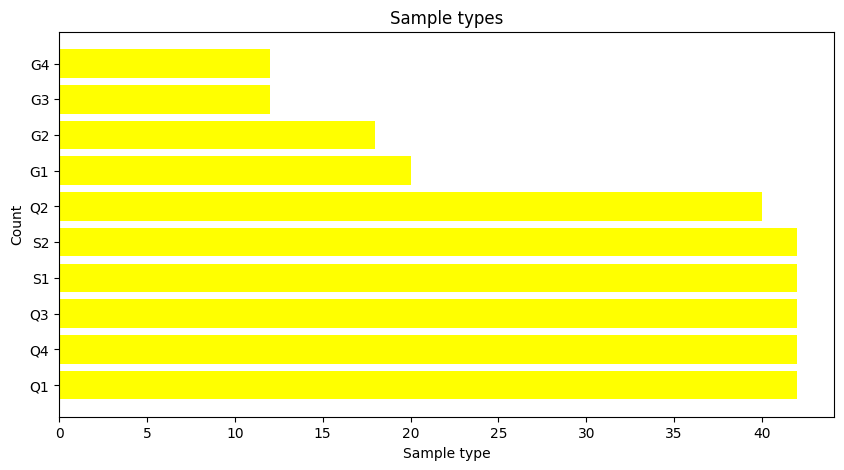

In [12]:
plt.figure(figsize=(10,5))
plt.barh(Sample_type_values.index, Sample_type_values.values, color='yellow')
plt.title('Sample types')
plt.xlabel('Sample type')
plt.ylabel('Count')
plt.show()

As we saw before, S1 and S2 are among the most used samples. Even though they do not have any animals, this shows there is no relationship between whether a sample has animals and the number of times it is used, and It may indicate that S1 and S2 are being used as baselines or control samples to compare with samples from paddocks with animals


#### Biomass 

After I figure that there is a places that dont have animals i want to see if this locations that dont have animals have high biomass

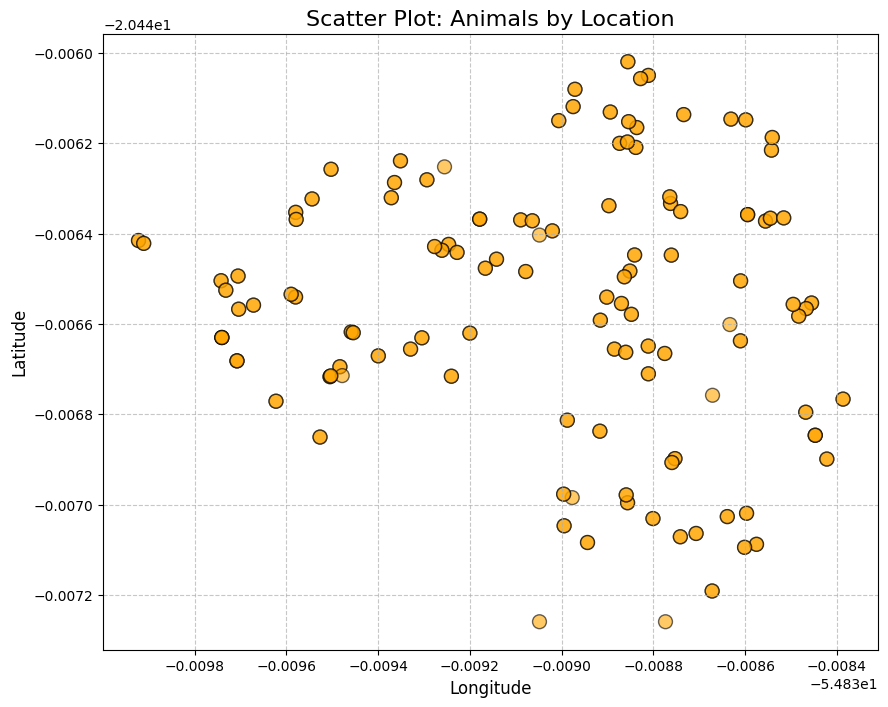

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Long_'], df['Lat'], s=df['Animals'] * 100, alpha=0.6, color='orange', edgecolors='black')
plt.title('Scatter Plot: Animals by Location', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16596\2958405354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Animals', y='Biomass', data=df, palette=['skyblue', 'lightgreen'])


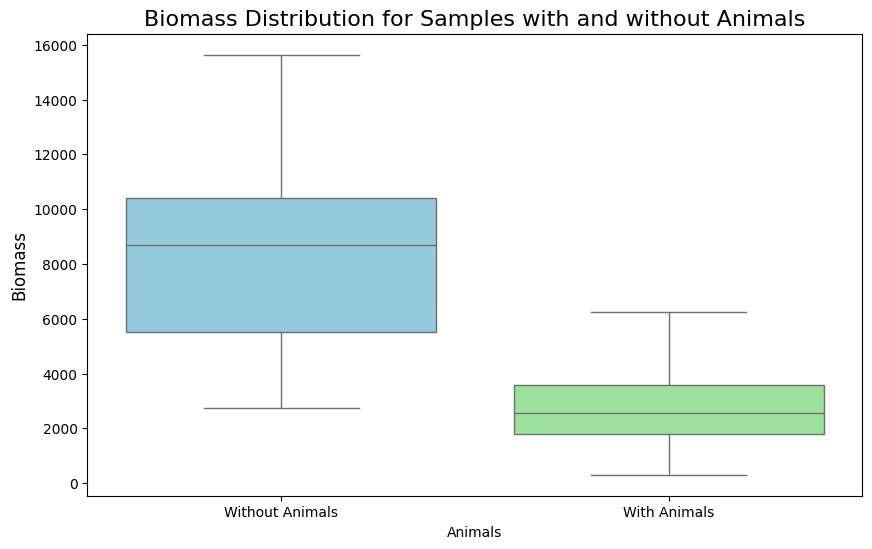

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Animals', y='Biomass', data=df, palette=['skyblue', 'lightgreen'])
plt.title('Biomass Distribution for Samples with and without Animals', fontsize=16)
plt.ylabel('Biomass', fontsize=12)
plt.xticks([0, 1], ['Without Animals', 'With Animals'], fontsize=10)
plt.show()


There is indeed a relationship: all the areas without animals show very high biomass. Therefore, I recommend managing the placement of animals on the farm to ensure consistent and healthy biomass levels across the entire farm.

## Biomass through days


In [15]:
df_copy = df.copy()
df_copy['Month'] = pd.to_datetime(df['Date']).dt.month
sns.boxplot(x='Month', y='Biomass', data=df)


ValueError: Could not interpret value `Month` for `x`. An entry with this name does not appear in `data`.


1. Peak Biomass in March:
   - March (Month 3) exhibits the highest variability and the largest median biomass, indicating that it is a peak production month with a wide range of conditions.

2. Low Biomass in Winter Months:
   - January (Month 1) and December (Month 12) have relatively low biomass values, with smaller ranges and lower medians, suggesting reduced growth during colder months.

3. Steady Biomass in Spring and Summer:
   - Months 4 through 7 show relatively consistent biomass production with moderate ranges and medians.

4. significant Decline in Autumn:
   - Biomass drops significantly in September (Month 9), indicating reduced growth during this period.



# Best environment 

In this part I want to find the best enviroment to get a best Forage  

To get a best forage We need high (CP) and Low (NDF,ADF) Balanced (DM)

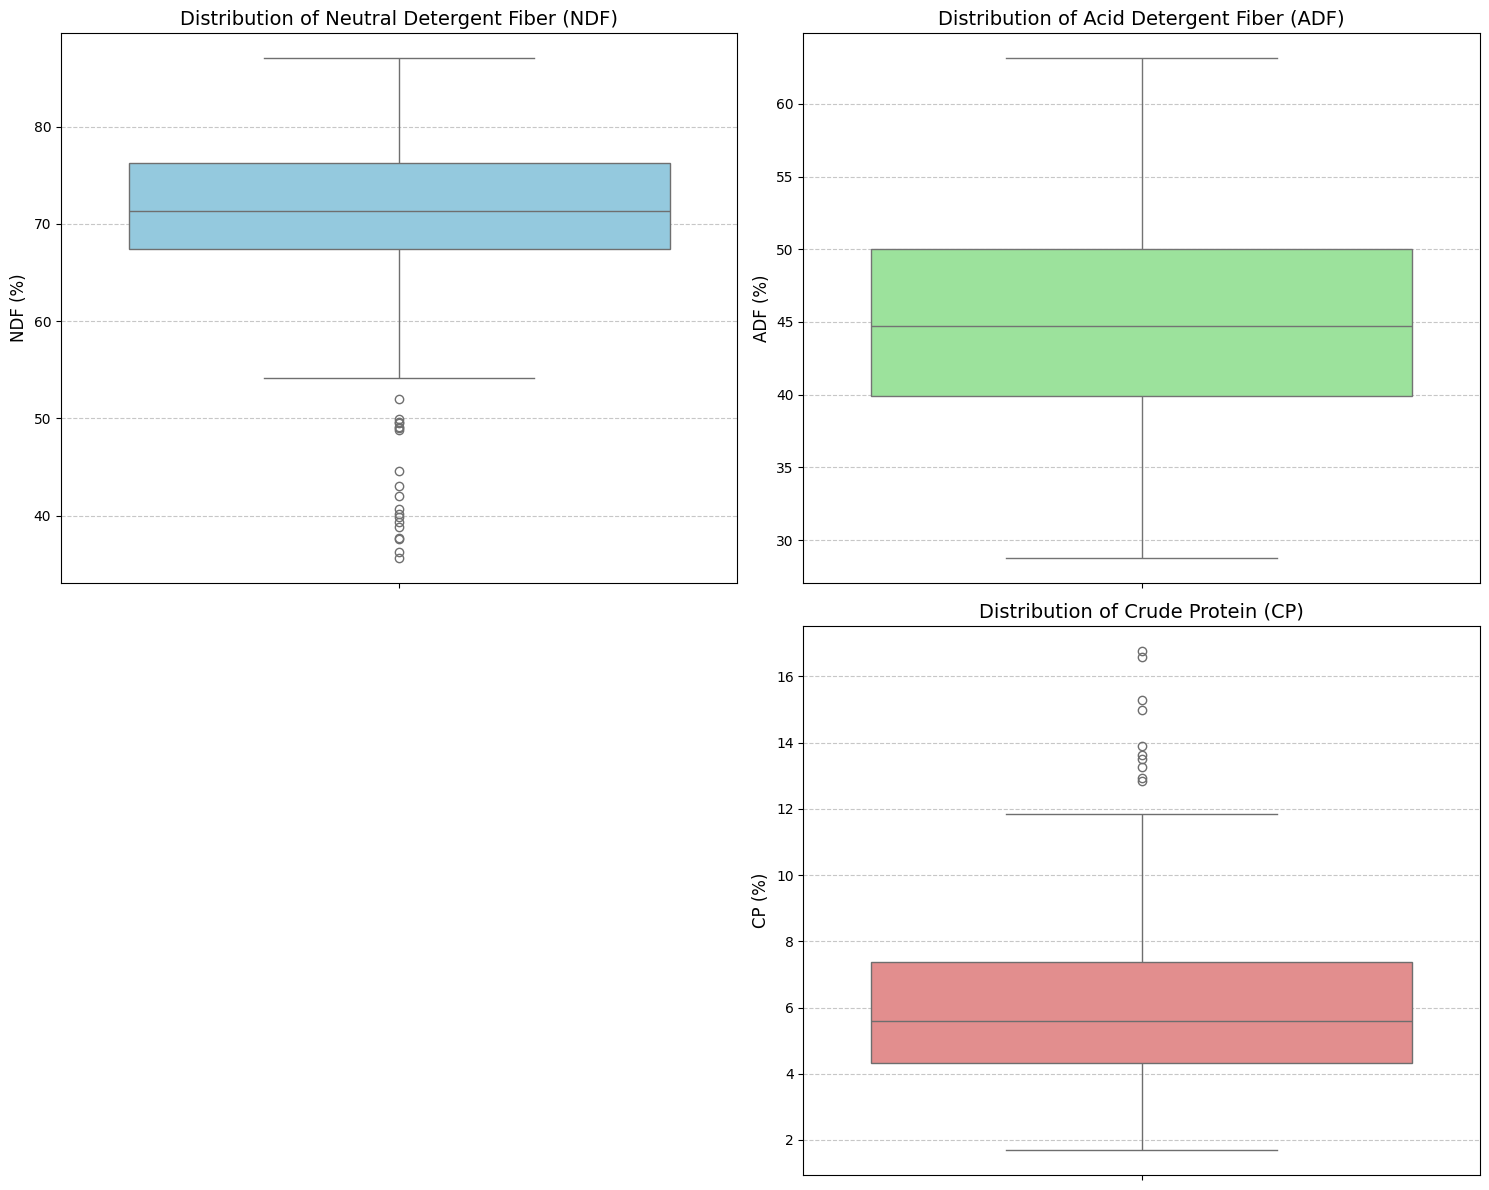

In [71]:
plt.figure(figsize=(15, 12))

# Plot 1: Box Plot for NDF
plt.subplot(2, 2, 1)  # Top-left
sns.boxplot(y='NDF', data=df, color='skyblue')
plt.title('Distribution of Neutral Detergent Fiber (NDF)', fontsize=14)
plt.ylabel('NDF (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Box Plot for ADF
plt.subplot(2, 2, 2)  # Top-right
sns.boxplot(y='ADF', data=df, color='lightgreen')
plt.title('Distribution of Acid Detergent Fiber (ADF)', fontsize=14)
plt.ylabel('ADF (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Box Plot for CP
plt.subplot(2, 2, 4)  # Bottom-right
sns.boxplot(y='CP', data=df, color='lightcoral')
plt.title('Distribution of Crude Protein (CP)', fontsize=14)
plt.ylabel('CP (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


NDF:
Low NDF outliers represent high-quality forage paddocks.


ADF:
ADF values near 50% or higher could reduce digestibility and require monitoring.

CP:
High CP outliers could represent paddocks with optimal conditions for forage growth, possibly due to better fertilization or species composition

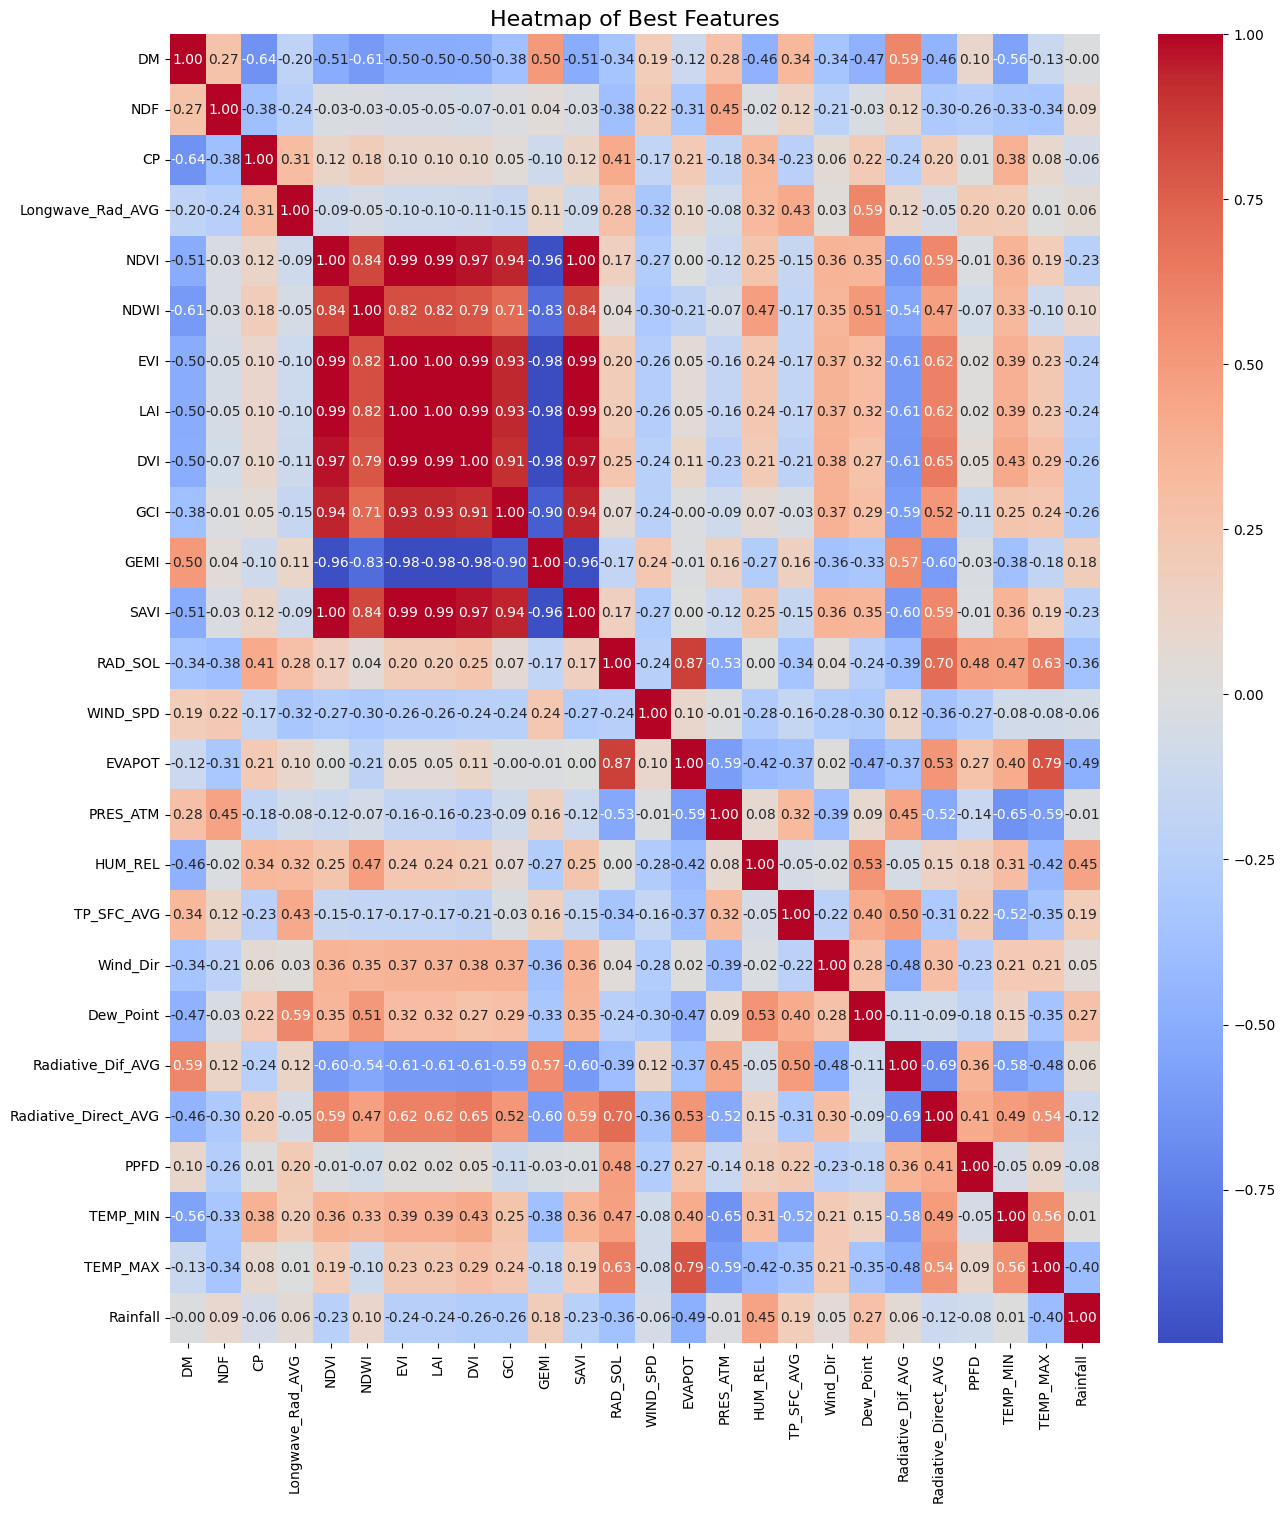

In [72]:
features = df[['DM', 'NDF', 'CP',  
                    'Longwave_Rad_AVG', 'NDVI', 'NDWI', 'EVI',
                    'LAI', 'DVI', 'GCI', 'GEMI', 'SAVI', 
                    'RAD_SOL', 'WIND_SPD', 'EVAPOT', 'PRES_ATM', 
                    'HUM_REL', 'TP_SFC_AVG', 'Wind_Dir', 'Dew_Point', 
                    'Radiative_Dif_AVG', 'Radiative_Direct_AVG', 'PPFD',
                    'TEMP_MIN', 'TEMP_MAX', 'Rainfall']]

plt.figure(figsize=(15,17))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Best Features', fontsize=16)
plt.show()

### best tempreture for forage

In [73]:
df[['Rainfall','TEMP_MAX','TEMP_MIN']].describe()

,Rainfall,TEMP_MAX,TEMP_MIN
count,312.000000,312.000000,312.000000
mean,1.291026,31.096795,20.689744
std,3.564461,1.990796,2.565168
min,0.000000,26.600000,14.600000
25%,0.000000,30.400000,18.300000
50%,0.000000,31.300000,21.200000
75%,0.800000,32.000000,22.700000
max,18.400000,35.100000,25.700000


In [74]:
# Filter data
Low_NDF = df[(df['NDF'] < 50)  ][['NDF','Biomass','Rainfall', 'TEMP_MAX', 'TEMP_MIN','WIND_SPD','PRES_ATM','Wind_Dir']]
High_CP = df[df['CP'] > 12][['CP','Biomass','Rainfall', 'TEMP_MAX', 'TEMP_MIN','WIND_SPD','PRES_ATM','Wind_Dir']]
Low_ADF = df[df['ADF'] < 45][['ADF','Biomass','Rainfall', 'TEMP_MAX', 'TEMP_MIN','WIND_SPD','PRES_ATM','Wind_Dir']]

# Display relevant information for NDF outliers
print("NDF Outliers:")
print(Low_NDF)

# Display relevant information for CP outliers
print("CP Outliers:")
print(High_CP)

# Display relevant information for ADF outliers
print("ADF Outliers:")
print(Low_ADF)

NDF Outliers:
           NDF      Biomass  Rainfall  TEMP_MAX  TEMP_MIN  WIND_SPD  \
232  39.285663  3195.333333       0.4      33.9      22.5      12.4   
233  43.041412  3195.333333       0.4      33.9      22.5      12.4   
234  35.664297  1653.000000       0.4      33.9      22.5      12.4   
235  36.268380  1653.000000       0.4      33.9      22.5      12.4   
236  37.569954  1781.333333       0.4      33.9      22.5      12.4   
237  37.713389  1781.333333       0.4      33.9      22.5      12.4   
238  38.791407  1798.666667       0.4      33.9      22.5      12.4   
239  39.856090  1798.666667       0.4      33.9      22.5      12.4   
242  49.920449  5729.666667       0.4      33.9      22.5      12.4   
243  49.581440  5729.666667       0.4      33.9      22.5      12.4   
244  42.000300  1731.000000       3.3      32.3      25.7       9.5   
245  44.563506  1731.000000       3.3      32.3      25.7       9.5   
296  40.668069  5292.000000       0.8      30.4      23.3      

In [76]:
NDF_range= Low_NDF.max() - Low_NDF.min()
CP_range= High_CP.max() - High_CP.min()
ADF_range= Low_ADF.max() - Low_ADF.min()

print(f"\n#NDF_range:\n\n{NDF_range}")
print(f"\n#cp range:\n \n{CP_range}")
print(f"\n #ADF range:\n \n{ADF_range}")



#NDF_range:

NDF           14.256152
Biomass     4167.000000
Rainfall       2.900000
TEMP_MAX       3.500000
TEMP_MIN       3.200000
WIND_SPD       4.400000
PRES_ATM      13.166667
Wind_Dir      87.126489
dtype: float64

#cp range:
 
CP             3.928160
Biomass     5106.000000
Rainfall       2.300000
TEMP_MAX       3.200000
TEMP_MIN       2.100000
WIND_SPD       8.200000
PRES_ATM       2.562500
Wind_Dir      62.926288
dtype: float64

 #ADF range:
 
ADF            16.186894
Biomass     15328.800003
Rainfall       18.400000
TEMP_MAX        8.500000
TEMP_MIN        8.600000
WIND_SPD       15.100000
PRES_ATM       13.437500
Wind_Dir      117.451442
dtype: float64


# Temperature and Solar radiation

In [94]:
categorical_df = df.copy()
categorical_df["Biomass_cat"] = pd.qcut(df['Biomass'], q=4, labels=['Very Low', 'Low', 'High', 'Very High'])
categorical_df["Temperature_cat"] = pd.qcut(df['TEMP_MAX'], q=3, labels=['Cold', 'Moderate', 'Hot'])
categorical_df["Solar_Rad_cat"] = pd.qcut(df['RAD_SOL'], q=3, labels=['Low', 'Moderate', 'High'])
categorical_df

,Date,DOY,Sample,Sub-Sample,Lat,Long_,Sample_type,Animals,DM,MM,...,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG,Environmental Suitability Index,SAVI_Bin,Biomass_cat,Temperature_cat,Solar_Rad_cat
0,7/6/2022,187,1,1,-20.446717,-54.839505,Q1,1,54.177195,6.869019,...,8.584028,160.617416,7.444173,358.837504,344.212487,3.209516,Medium,Low,Moderate,Low
1,7/6/2022,187,1,2,-20.446717,-54.839505,Q1,1,54.177058,6.835684,...,8.584028,160.617416,7.444173,358.837504,344.212487,5.109516,Medium,Low,Moderate,Low
2,7/6/2022,187,2,1,-20.446996,-54.838856,Q4,1,52.260843,5.125652,...,8.584028,160.617416,7.444173,358.837504,344.212487,3.506646,Medium,Low,Moderate,Low
3,7/6/2022,187,2,2,-20.446996,-54.838856,Q4,1,52.285797,5.241126,...,8.584028,160.617416,7.444173,358.837504,344.212487,4.606646,Medium,Low,Moderate,Low
4,7/6/2022,187,3,1,-20.446424,-54.839246,G2,1,49.984466,4.742429,...,8.584028,160.617416,7.444173,358.837504,344.212487,3.703806,Medium,Low,Moderate,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,3/1/2023,60,154,2,-20.446365,-54.838516,Q4,1,31.915926,10.798575,...,12.442361,70.217280,296.533237,593.233703,400.042911,5.312839,High,Low,Hot,Moderate
308,3/1/2023,60,155,1,-20.446937,-54.839311,S1,0,45.505167,8.263333,...,12.442361,70.217280,296.533237,593.233703,400.042911,4.237497,High,Very High,Hot,Moderate
309,3/1/2023,60,155,2,-20.446937,-54.839311,S1,0,45.493257,8.218142,...,12.442361,70.217280,296.533237,593.233703,400.042911,5.537497,High,Very High,Hot,Moderate
310,3/1/2023,60,156,1,-20.446972,-54.839168,S2,0,43.740695,8.313133,...,12.442361,70.217280,296.533237,593.233703,400.042911,4.834511,High,Very High,Hot,Moderate


In [97]:
contingency_table = pd.crosstab(categorical_df["Solar_Rad_cat"], categorical_df["Temperature_cat"], margins=True, margins_name='Total')
contingency_table

Temperature_cat,Cold,Moderate,Hot,Total
Solar_Rad_cat,,,,
Low,52,54,0,106
Moderate,40,52,24,116
High,16,0,74,90
Total,108,106,98,312


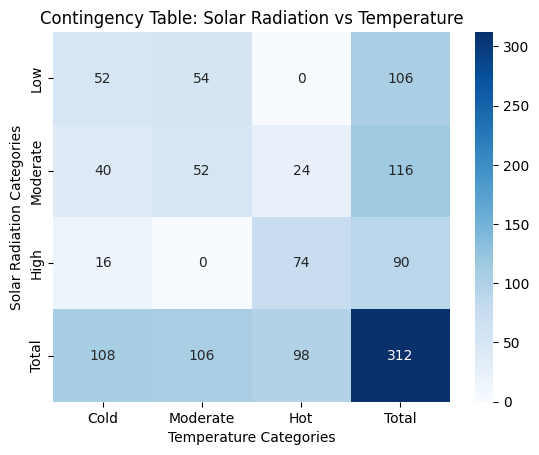

In [98]:
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title('Contingency Table: Solar Radiation vs Temperature')
plt.xlabel('Temperature Categories')
plt.ylabel('Solar Radiation Categories')
plt.show()


There is a positive relation between solar radiant and temprature

1)Dominance of Low and Moderate Solar Radiation:

-Low and Moderate solar radiation occur more frequently (106 and 116 occurrences, respectively).
-High solar radiation is the least frequent (90 occurrences).

2)Associations Between Categories:

-Low Solar Radiation:

    -Mostly associated with Cold (52 occurrences) and Moderate (54 occurrences) temperatures.
    -Never occurs with Hot temperatures.

-Moderate Solar Radiation:
    -Spread across Cold (40), Moderate (52), and Hot (24) temperatures.

-High Solar Radiation:

    -Strongly associated with Hot (74 occurrences) temperatures.
    -Rarely occurs with Cold (16 occurrences) and never with Moderate.

Temperature Distribution Across Solar Radiation:

    -Cold is the most frequent temperature category (108 occurrences overall).
    -Hot is the least frequent (98 occurrences overall) but dominates High solar radiation.
